# Linear regression with TensorFlow 1.4
### Part one: Numpy method 10:45

In [1]:
import pandas as pd
import tensorflow as tf
import itertools

C:\ProgramData\Anaconda3\envs\OLD_TF\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\OLD_TF\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\OLD_TF\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\OLD_TF\lib\site-packages\tensorflow\pyth

Source of data: https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant

## Combined Cycle Power Plant Data Set
#### Data Set Information:

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.
For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.
We provide the data both in .ods and in .xlsx formats.


#### Attribute Information:

Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.




### <span style="color:darkBlue">Step 1: prepare the data</span>

In [2]:
df = pd.read_csv('c:/1/Folds5x2_pp.csv')
df.sample(3)

,Unnamed: 0,AT,V,AP,RH,PE
5475,5475,23.59,58.62,1017.81,66.68,448.09
7142,7142,8.09,43.02,1014.79,81.06,484.35
2214,2214,20.67,70.02,1010.42,94.09,448.75


In [3]:
del df['Unnamed: 0']
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [4]:
df.columns = ['Temperature', 'Exhaust_Vacuum', 'Ambient_Pressure', 'Relative_Humidity', 'Energy_output']
df.sample(3)

,Temperature,Exhaust_Vacuum,Ambient_Pressure,Relative_Humidity,Energy_output
4743,15.62,41.76,1023.82,66.17,459.72
7877,29.45,64.96,1005.52,59.92,433.04
4212,24.96,69.68,1011.37,63.12,447.20


<span style="color:Blue">Separation of a column into an independent variable and a dependent variable.</span>


In [5]:
#y =df['Energy_output']
#X = df.drop('Energy_output', axis=1) 

#<span style="color:Blue">Separation of independent and dependent variables into training 77% and test sets 33%.</span>

In [6]:
#from sklearn.model_selection import train_test_split 
#Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.33, random_state = 148)

In [7]:
#print(Xtrain.shape, ytrain.shape,Xtest.shape, ytest.shape )

In [8]:
#Train_set = pd.merge(ytrain,Xtrain, how='inner', left_index=True, right_index=True)
#Test_set = pd.merge(ytest,Xtest, how='inner', left_index=True, right_index=True)

In [9]:
#print(Train_set.shape, Test_set.shape)

### <span style="color:darkBlue">Step 2: Convert Data</span>

We convert numeric variables in the correct Tensorflow format. Tensorflow provides a continuous variable conversion method: tf.feature_column.numeric_column ().

<span style="color:Blue">Separation of a column into an independent variable and a dependent variable.</span>

In [10]:
FEATURES = ['Temperature', 'Exhaust_Vacuum', 'Ambient_Pressure', 'Relative_Humidity']
LABEL = 'Energy_output'

In [11]:
Ewa = [tf.feature_column.numeric_column(k) for k in FEATURES]
Ewa

[_NumericColumn(key='Temperature', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Exhaust_Vacuum', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Ambient_Pressure', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Relative_Humidity', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

### <span style="color:darkBlue">Step 3: Defining the estimator</span>

Tensorflow will automatically create a file called "train2" in your working directory. You must use this path to access Tensorboard. The estimator applies to independent variables.

In [12]:
estimator = tf.estimator.LinearRegressor(    
        feature_columns=Ewa,   
        model_dir="train2")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'train2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002038B3C4F28>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


To instruct Tensorflow how to feed the model, you can use pandas_input_fn. This object needs 5 parameters:
x: function data y: label data batch_size: batch. Default 128 num_epoch: by default number of epochs 1 random: Random or not data. Default None

In [13]:
def get_input_fn(data_set, num_epochs=None, n_batch = 128, shuffle=True):    
         return tf.estimator.inputs.pandas_input_fn(       
         x=pd.DataFrame({k: data_set[k].values for k in FEATURES}),       
         y = pd.Series(data_set[LABEL].values),       
         batch_size=n_batch,          
         num_epochs=num_epochs,       
         shuffle=shuffle)

### <span style="color:darkBlue">Step 4: Model training</span>

    - To feed the model you can use the function created above: get_input_fn.
    - Then you instruct the model to iterate 1000 times.
    - Remember that you do not specify the number of epochs (num_epochs).
    - It is better to set the number of epochs to none and define the number of iterations.
    
  To test the model, we must divide the data set into a test set and a training set.

In [14]:
df_train=df.sample(frac=0.8,random_state=200)
df_test=df.drop(df_train.index)
print(df_train.shape, df_test.shape)

(7654, 5) (1914, 5)


In [15]:
estimator.train(input_fn=get_input_fn(df_train,                                       
                                           num_epochs=None,                                      
                                           n_batch = 356,                                      
                                           shuffle=False),                                      
                                           steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from train2\model.ckpt-12500
INFO:tensorflow:Saving checkpoints for 12501 into train2\model.ckpt.
INFO:tensorflow:loss = 8189.783, step = 12501
INFO:tensorflow:global_step/sec: 338.89
INFO:tensorflow:loss = 9847.09, step = 12601 (0.297 sec)
INFO:tensorflow:global_step/sec: 367.738
INFO:tensorflow:loss = 8584.168, step = 12701 (0.272 sec)
INFO:tensorflow:global_step/sec: 369.969
INFO:tensorflow:loss = 9343.146, step = 12801 (0.270 sec)
INFO:tensorflow:global_step/sec: 365.937
INFO:tensorflow:loss = 9144.299, step = 12901 (0.274 sec)
INFO:tensorflow:global_step/sec: 363.286
INFO:tensorflow:loss = 8712.707, step = 13001 (0.274 sec)
INFO:tensorflow:global_step/sec: 372.741
INFO:tensorflow:loss = 8398.671, step = 13101 (0.268 sec)
INFO:tensorflow:global_step/sec: 372.74
INFO:tensorflow:loss = 8794.435, step = 13201 (0.268 sec)
INFO:tensorflow:global_step/sec: 371.358
INFO:tensorflow:loss = 11182.033, step = 133

<span style="color:Blue">We check the CMD TensorBoard command console.</span>

##### tensorboard --logdir=.\train\linreg

Tensorboard is located in this URL: http://localhost:6006

It could also be located at the following location.

 http://wo_moszczynski:6006
 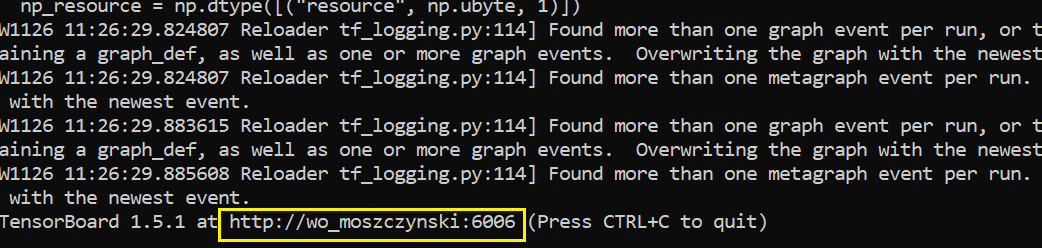

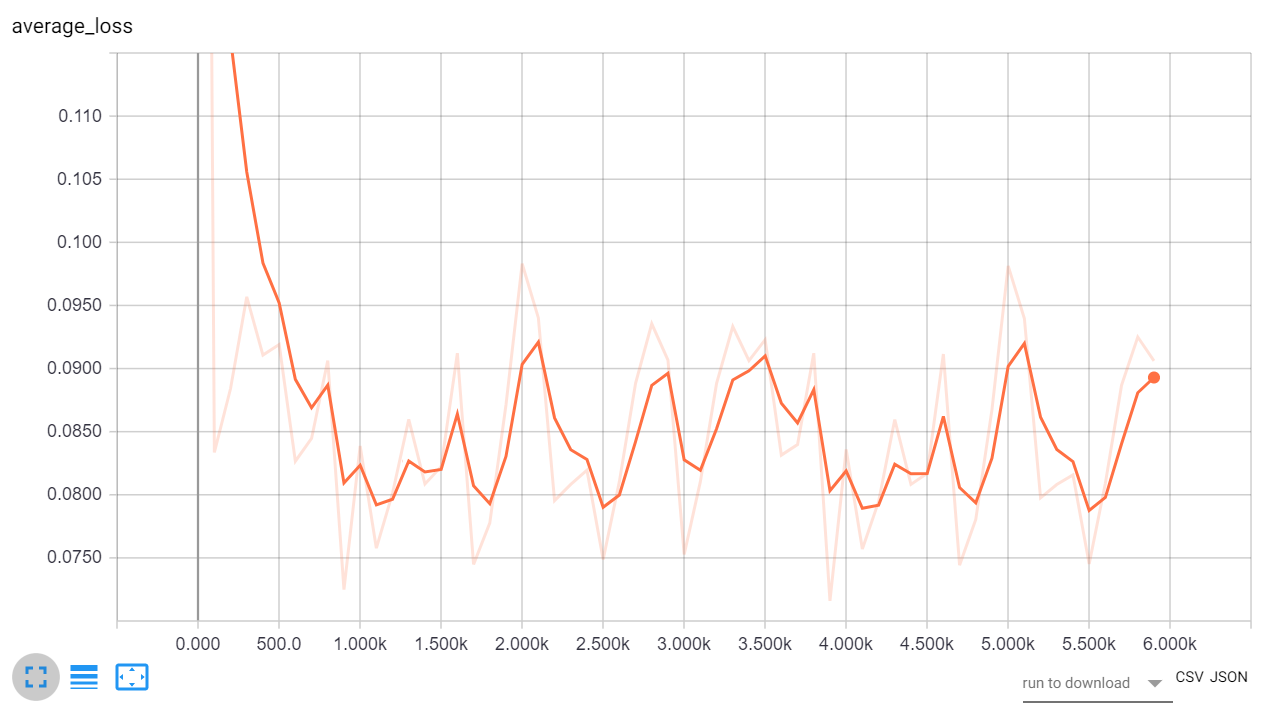

## <span style="color:darkblue">Step 5. Model assessment</span>

To enter a test set, use the following code:

In [16]:
ev = estimator.evaluate(    
          input_fn=get_input_fn(df_test,                          
          num_epochs=1,                          
          n_batch = 356,                          
          shuffle=False))

INFO:tensorflow:Starting evaluation at 2019-11-26-11:18:07
INFO:tensorflow:Restoring parameters from train2\model.ckpt-13500
INFO:tensorflow:Finished evaluation at 2019-11-26-11:18:07
INFO:tensorflow:Saving dict for global step 13500: average_loss = 25.832636, global_step = 13500, loss = 8240.61


Print the loss using by the code below:

In [19]:
average_loss = ev["average_loss"]
print("average_loss: ",format(average_loss))

average_loss:  25.8326358795166


In [20]:
loss_score = ev["loss"]
print("Loss: {0:f}".format(loss_score))	

Loss: 8240.610352


The model has a average loss of 26. You can check the summary statistics to find out how big the error is.

In [21]:
df_test['Energy_output'].describe()

count    1914.000000
mean      454.443861
std        17.453640
min       425.110000
25%       439.220000
50%       452.000000
75%       469.075000
max       495.230000
Name: Energy_output, dtype: float64

In [22]:
PKP=(average_loss/ df_test['Energy_output'].mean())*100
print('Average error in relation to the average value: ',PKP)

Average error in relation to the average value:  5.684450400827492


## <span style="color:darkblue">Step 6. Making a forecast</span>

Making a forecast is based on the fact that we have a model and we have a set of independent variables. Now we substitute the independent variables into the model and get the result. We will create 4 random variables and make a forecast for these records.

##### We create a sample of 4 records without output variables.

In [32]:
import numpy as np

sample4 =df.sample(4)
result = sample4['Energy_output'].copy() ## <= to have a comparison later
sample4['Energy_output']=np.nan
sample4

,Temperature,Exhaust_Vacuum,Ambient_Pressure,Relative_Humidity,Energy_output
8204,18.27,58.20,1018.34,72.73,NaN
5590,32.02,67.83,1007.77,53.31,NaN
521,10.48,40.22,1004.81,92.16,NaN
8031,18.09,43.72,1008.64,74.15,NaN


In [33]:
y = estimator.predict(    
         input_fn=get_input_fn(sample4,                          
         num_epochs=1,                          
         n_batch = 256,                          
         shuffle=False))

In [25]:
predictions = list(p["predictions"] for p in itertools.islice(y, 4))
print("Predictions: {}".format(str(predictions)))

INFO:tensorflow:Restoring parameters from train2\model.ckpt-13500
Predictions: [array([437.47916], dtype=float32), array([473.30472], dtype=float32), array([446.49448], dtype=float32), array([436.26865], dtype=float32)]


In [34]:
predictions

[array([437.47916], dtype=float32),
 array([473.30472], dtype=float32),
 array([446.49448], dtype=float32),
 array([436.26865], dtype=float32)]

I'm converting array to dataframe

In [35]:
conc = np.vstack(predictions)
conc

array([[437.47916],
       [473.30472],
       [446.49448],
       [436.26865]], dtype=float32)

In [36]:
newdf = pd.DataFrame(conc)
newdf

,0
0,437.479156
1,473.304718
2,446.494476
3,436.268646


In [31]:
result

1502    431.41
6822    446.54
5135    443.59
5880    434.32
Name: Energy_output, dtype: float64